# Visual Analytics - Seaborn

Seaborn is python data visualization library that is based on matplotlib.

## Seaborn Plot Types

### Categorical Data Plots:
- countplot
- barplot
- swarmplot
- stripplot
- violinplot
- factorplot
- boxplot

### Distribution Plots:
- distplot
- jointplot
- pairplot
- rugplot
- kdeplot

### Regression Plots:
- lmplot

### Grid Plots:
- pairplot
- PairGrid
- FacetGrid
- JointGrid

### Matrix Plots:
- heatamp
- clustermap



#### Install necessary libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

#### Import necessary libraries

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

#### Import data
Let's import some data to plot with

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Categorical Plot Examples

### barplot

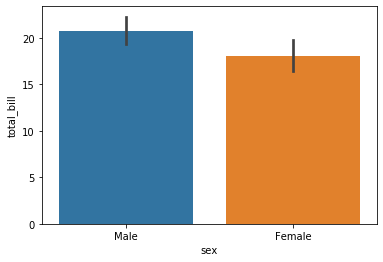

In [4]:
sns.barplot(x='sex',y='total_bill',data=df)

### countplot
Used to count samples.

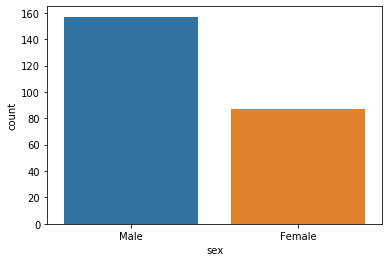

In [5]:
sns.countplot(x='sex',data=df)

### boxplot
box plots show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. They are used to show the distribution of categorical data

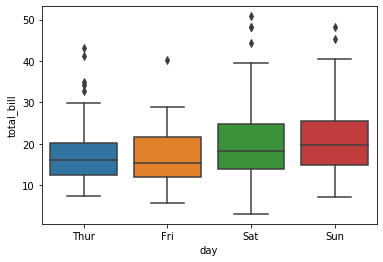

In [6]:
sns.boxplot(x="day", y="total_bill", data=df)

#### Hue
The hue argument can be used to split the data based on a 3rd feature. This causes each exiting box plot to be split into two corressponding to the 3rd feature.

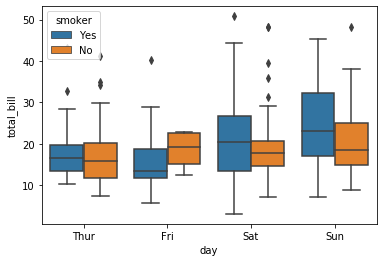

In [7]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=df)

### violinplot
violin plots are used for similar reasons to box plots. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

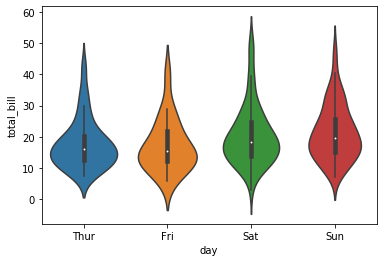

In [8]:
sns.violinplot(x="day", y="total_bill", data=df)

#### Hue
The hue argument can similarly be used with violin plots but violin plots also take an additional argument called `split` which allows each half of the violin plot to correspond to a value of the new feature.

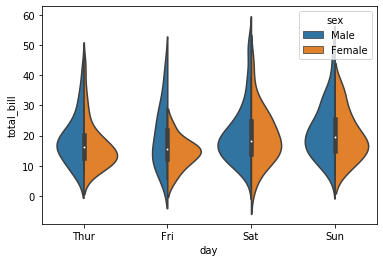

In [9]:
sns.violinplot(x="day", y="total_bill", data=df,hue='sex',split=True)

### stripplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

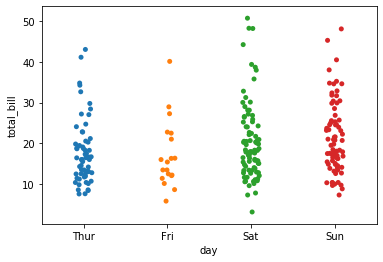

In [10]:
sns.stripplot(x="day", y="total_bill", data=df)

#### jitter
The `jitter` argument allows us to scatter the plots a bit so we can see how dense the data is.

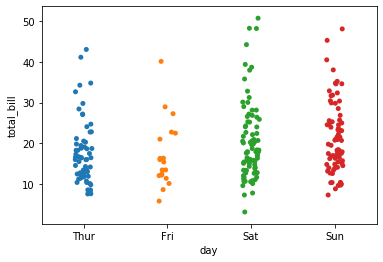

In [11]:
sns.stripplot(x="day", y="total_bill", data=df, jitter=True)

#### hue
The `hue` argument allows us to color the plots based on a 3rd argument. Here the additional `split` argument will split the stripplot into two separate plots.

##### w/o split

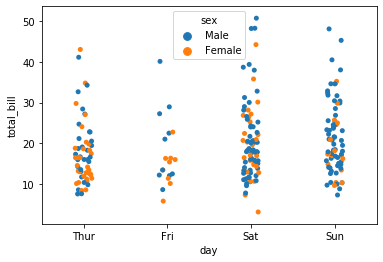

In [12]:
sns.stripplot(x="day", y="total_bill", data=df, jitter=True, hue='sex',dodge=False)

##### w/ split

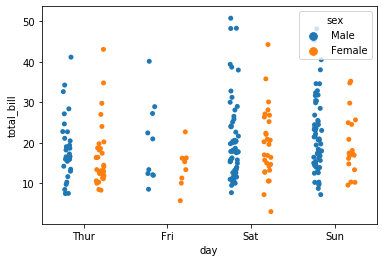

In [13]:
sns.stripplot(x="day", y="total_bill", data=df, jitter=True, hue='sex',dodge=True)

### swarmplot

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

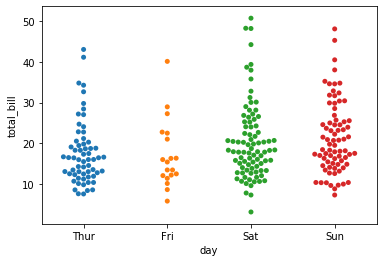

In [14]:
sns.swarmplot(x="day", y="total_bill", data=df)

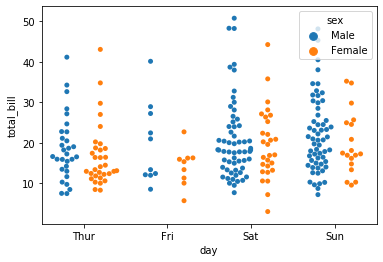

In [15]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=df, dodge=True)

### catplot

catplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

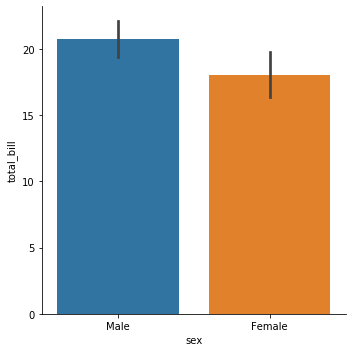

In [16]:
sns.catplot(x='sex',y='total_bill',data=df,kind='bar')

## Distribution Plots

### distplot

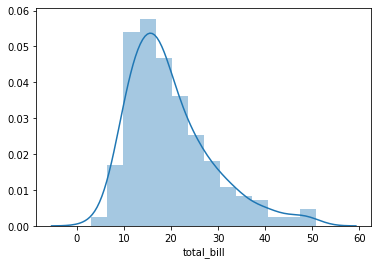

In [17]:
sns.distplot(df['total_bill'])

#### w/o kde

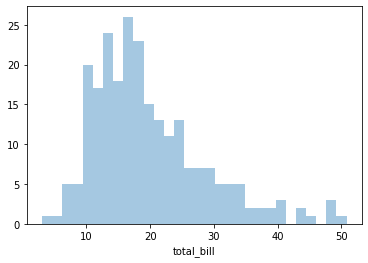

In [18]:
sns.distplot(df['total_bill'],kde=False,bins=30)

### jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

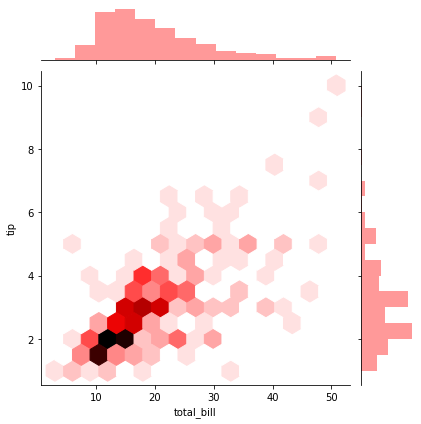

In [0]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex', color="red")

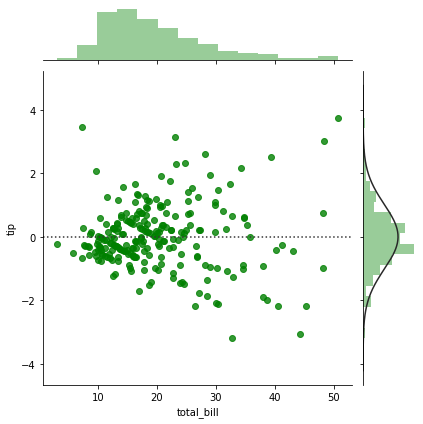

In [43]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='resid', color="green")

### pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

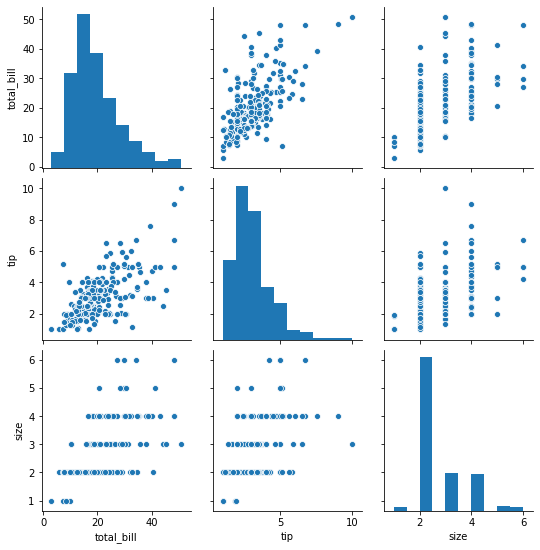

In [20]:
sns.pairplot(df)

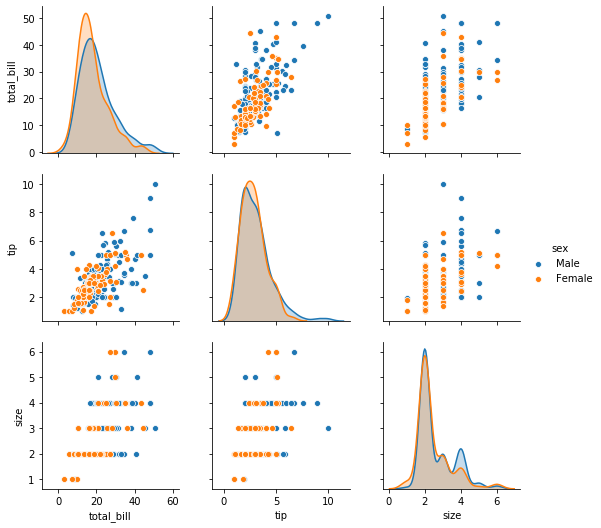

In [0]:
sns.pairplot(df,hue='sex')

### rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

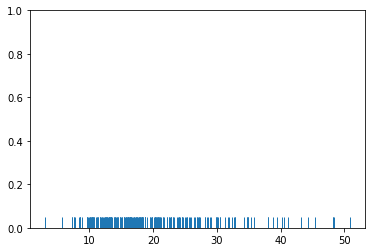

In [0]:
sns.rugplot(df['total_bill'])

### kdeplot
kdeplots or Kernal Density Estimation plots replace every single observation with a Gaussian (Normal) distriubtion centered around that value.

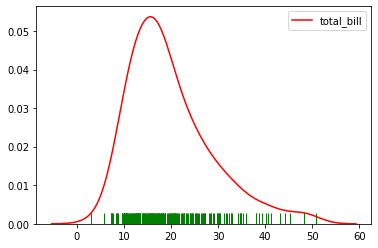

In [24]:
sns.kdeplot(df['total_bill'],color="red")
sns.rugplot(df['total_bill'],color="green")

## Regression plots

### lmplot
Draw a linear regression plot

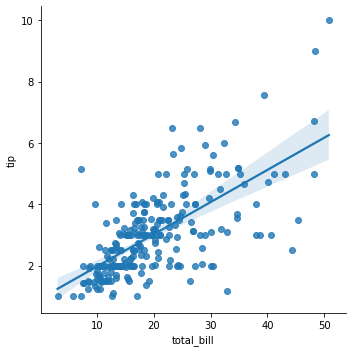

In [26]:
sns.lmplot(x='total_bill',y='tip',data=df)

#### Using hue

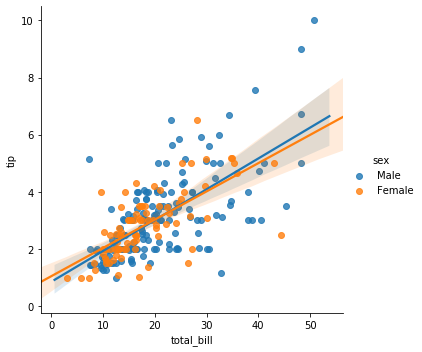

In [0]:
sns.lmplot(x='total_bill',y='tip',data=df, hue='sex')

#### Using col

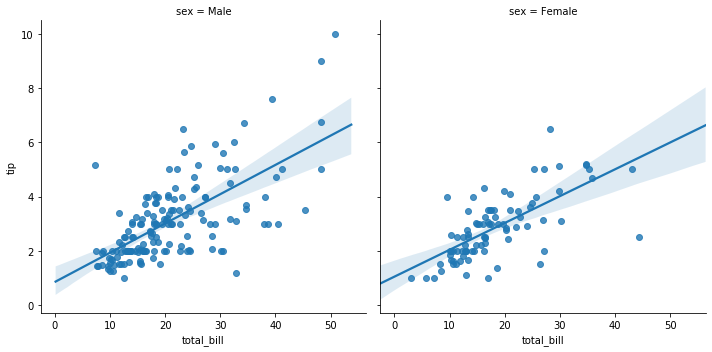

In [0]:
sns.lmplot(x='total_bill',y='tip',data=df,col='sex')

## Grids

In [0]:
irisDF = sns.load_dataset('iris')
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### PairGrid

#### Map to all

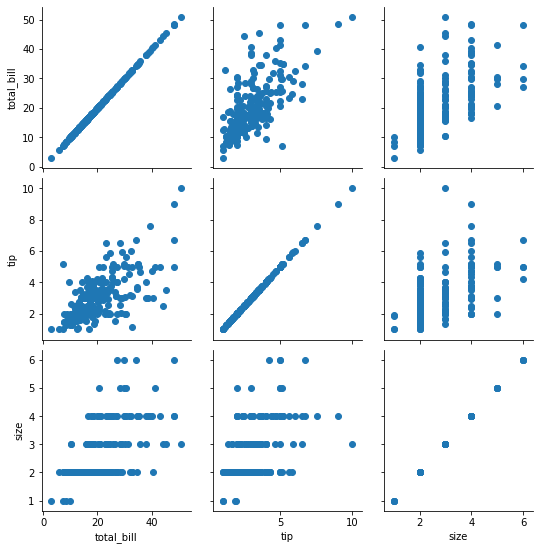

In [0]:
# Plot to pairgrid
g = sns.PairGrid(df)
g.map(plt.scatter) # feature wise scatter plot

#### Map to regions

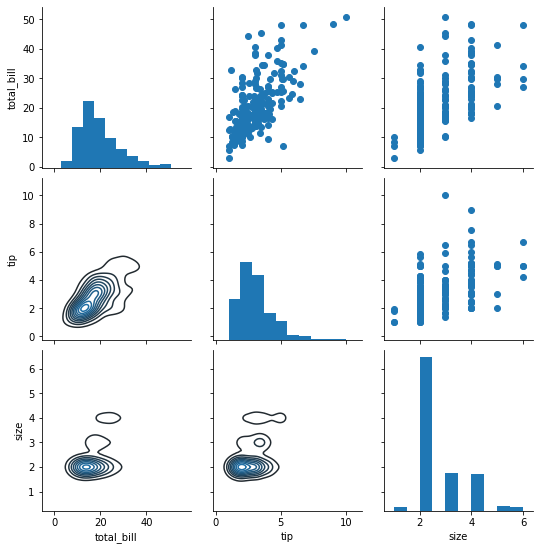

In [0]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### pairplot

`pairplot` is a simpler version of PairGrid

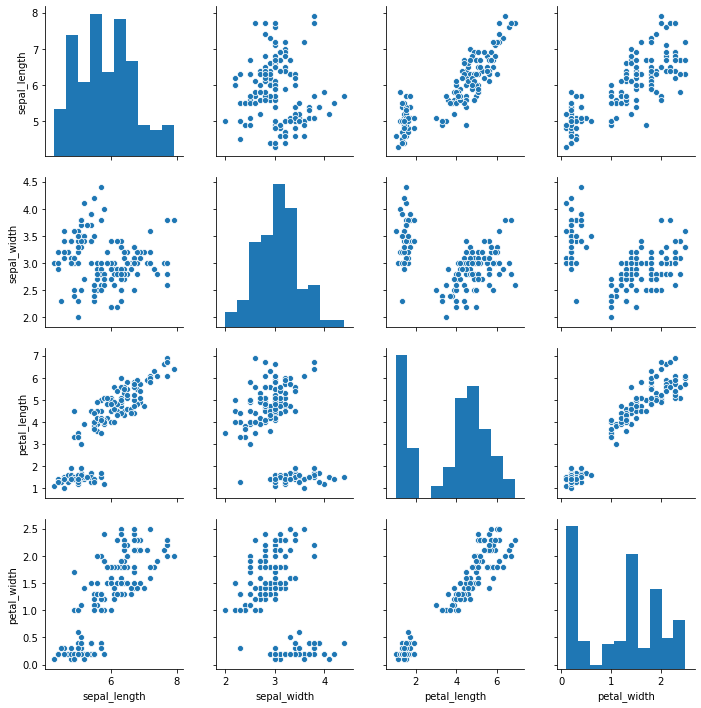

In [0]:
sns.pairplot(irisDF)

In [0]:
sns.pairplot(i)

NameError: ignored

### FacetGrid
General way to create a grid of a feature

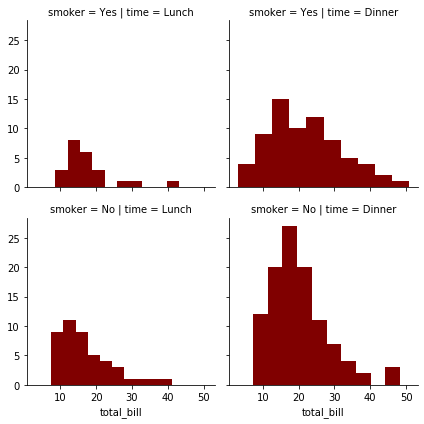

In [41]:
g = sns.FacetGrid(df, col="time",  row="smoker", )
g = g.map(plt.hist, "total_bill",color="maroon")

### JointGrid

JointGrid is the general version for jointplot() type grids

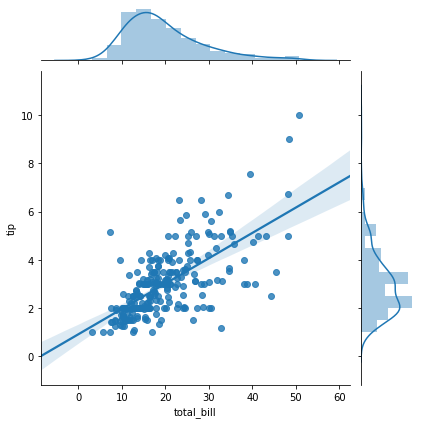

In [0]:
g = sns.JointGrid(x="total_bill", y="tip", data=df)
g = g.plot(sns.regplot, sns.distplot)

## Matrix Plots
Matrix plots allow you to plot data as color-encoded matrices.

### heatmap

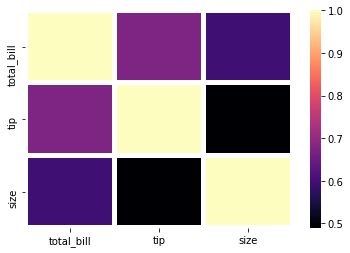

In [29]:
sns.heatmap(df.corr(), cmap='magma',linecolor='white',linewidths=4)

#### w/ annot (annotation)

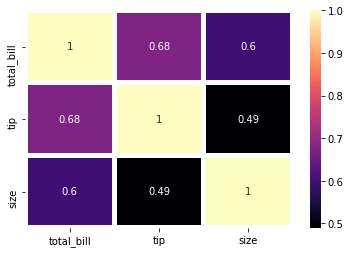

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='magma',linecolor='white',linewidths=4)

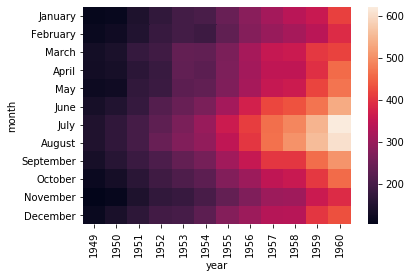

In [0]:
flights = sns.load_dataset('flights')
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

#### w/ separation using linecolor and linewidths

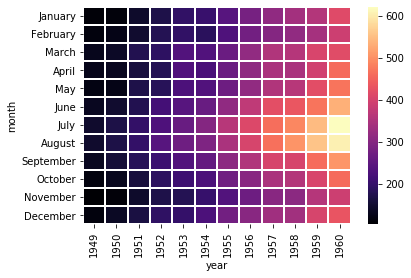

In [0]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

### clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

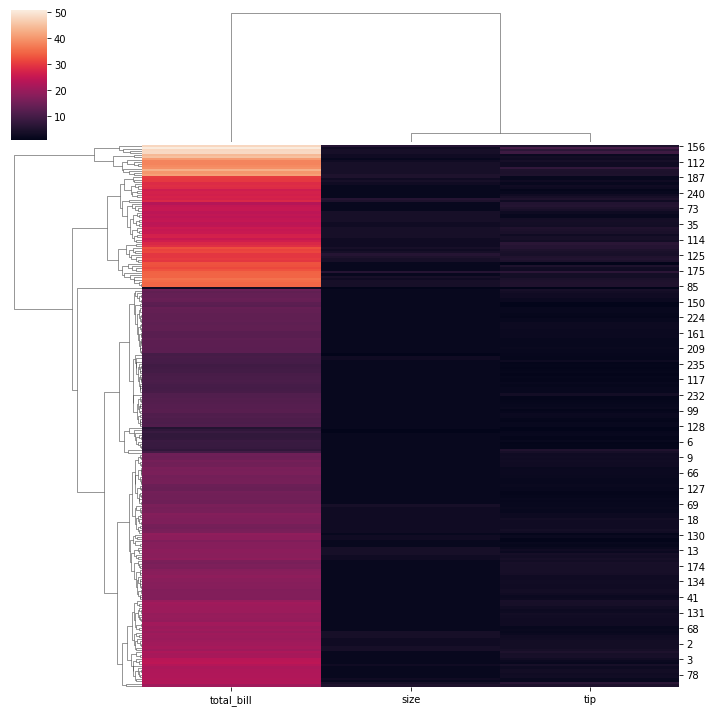

In [34]:
sns.clustermap(df[["size","tip","total_bill"]])

#### w/ scaling from 0-1 using standard_scale

In [32]:
sns.clustermap(pvflights,standard_scale=1)

NameError: ignored